# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [3]:
n = 64
x = np.linspace(0,1,n) + np.random.rand(4,n)
x = np.vstack([x,np.ones(len(x.T))]).T
y = np.linspace(0,1,n) + np.random.rand(n)-1

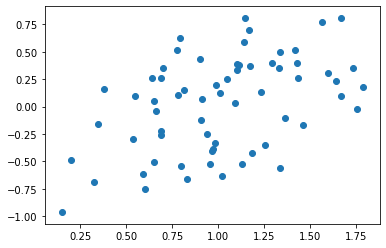

In [4]:
plt.scatter(x.T[0],y)

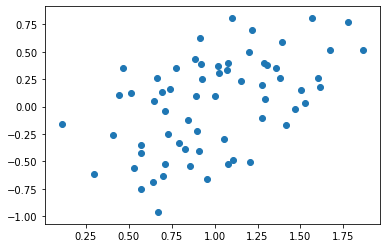

In [5]:
plt.scatter(x.T[1],y)

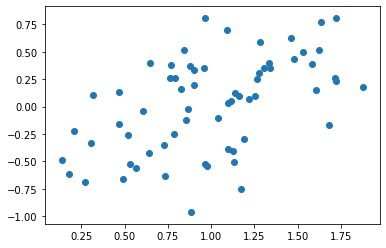

In [6]:
plt.scatter(x.T[2],y)

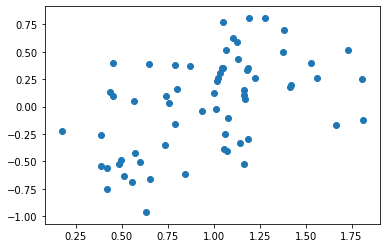

In [7]:
plt.scatter(x.T[3],y)

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [8]:
left = np.linalg.inv(np.dot(x.T,x))

left

array([[ 0.15156664, -0.05546734, -0.0335536 , -0.01510333, -0.05092274],
       [-0.05546734,  0.17114109, -0.04110847, -0.02465094, -0.04889978],
       [-0.0335536 , -0.04110847,  0.14420591, -0.05648989, -0.01468721],
       [-0.01510333, -0.02465094, -0.05648989,  0.15861937, -0.05674933],
       [-0.05092274, -0.04889978, -0.01468721, -0.05674933,  0.18561852]])

In [9]:
right = np.dot(y.T,x)

right

array([6.61243636, 6.92019157, 7.76783028, 6.70180508, 1.62863182])

In [10]:
np.dot(left, right)

array([ 0.17358752,  0.25338578,  0.21131314,  0.26134939, -0.86722572])

In [11]:
# Alternatively

beta = np.linalg.lstsq(x,y, rcond=None)[0]
beta

array([ 0.17358752,  0.25338578,  0.21131314,  0.26134939, -0.86722572])

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

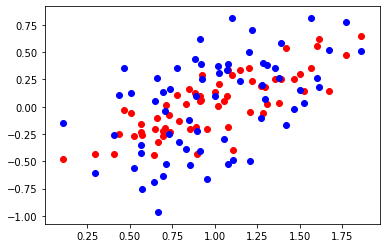

In [12]:
pred = np.dot(x,beta)

plt.scatter(x.T[1],pred,c='red')
plt.scatter(x.T[1],y, c='blue')

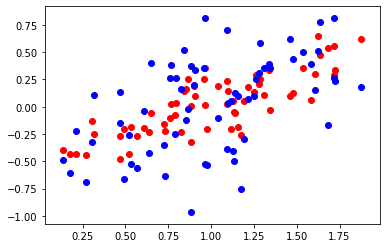

In [13]:
plt.scatter(x.T[2],pred,c='red')
plt.scatter(x.T[2],y, c='blue')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [25]:
import pandas as pd
credit = pd.read_csv('Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [26]:
print(credit.dtypes)

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object


In [27]:
x = credit[['Income', 'Limit','Cards','Age','Education','Balance']].values

In [28]:
y = credit['Rating']


In [29]:
left = np.linalg.inv(np.dot(x.T,x))


In [30]:
right = np.dot(y.T,x)

In [31]:
beta = np.dot(left, right)
beta

array([-1.47352977e-02,  6.79727002e-02,  5.99978634e+00,  1.19201683e-01,
        7.49574070e-01, -2.73902251e-03])

In [32]:
pred = np.dot(x,beta)

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

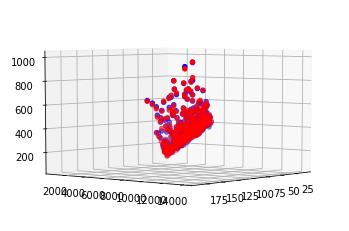

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 40)
ax.scatter(x.T[0], x.T[1], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[1], y, zdir='z', c='b')

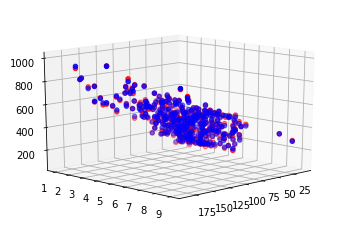

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, 45)
ax.scatter(x.T[0], x.T[2], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[2], y, zdir='z', c='b')

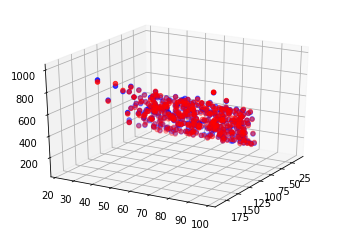

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(25, 30)
ax.scatter(x.T[0], x.T[3], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[3], y, zdir='z', c='b')

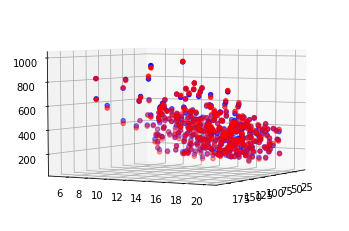

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 30)
ax.scatter(x.T[0], x.T[4], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[4], y, zdir='z', c='b')

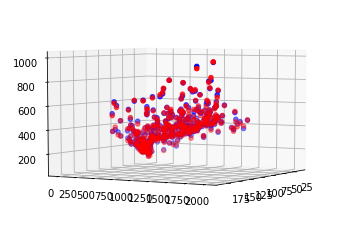

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 30)
ax.scatter(x.T[0], x.T[5], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[5], y, zdir='z', c='b')

Text(0, 0.5, 'Credit Rating')

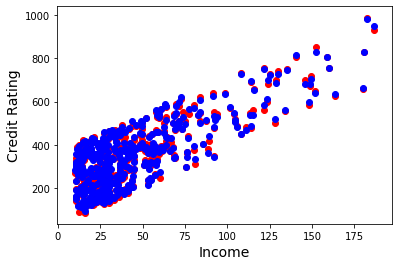

In [46]:
plt.scatter(x.T[0],pred,c='red')
plt.scatter(x.T[0],y, c='blue')
plt.xlabel('Income', fontsize=14)
plt.ylabel('Credit Rating', fontsize=14)

Text(0, 0.5, 'Credit Rating')

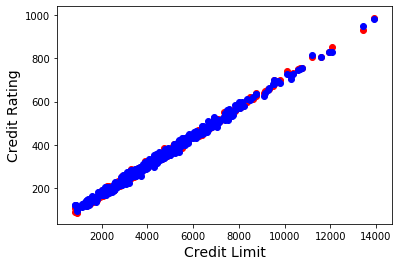

In [47]:
plt.scatter(x.T[1],pred,c='red')
plt.scatter(x.T[1],y, c='blue')
plt.xlabel('Credit Limit', fontsize=14)
plt.ylabel('Credit Rating', fontsize=14)

Text(0, 0.5, 'Credit Rating')

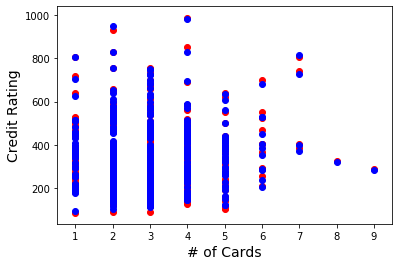

In [48]:
plt.scatter(x.T[2],pred,c='red')
plt.scatter(x.T[2],y, c='blue')
plt.xlabel('# of Cards', fontsize=14)
plt.ylabel('Credit Rating', fontsize=14)

Text(0, 0.5, 'Credit Rating')

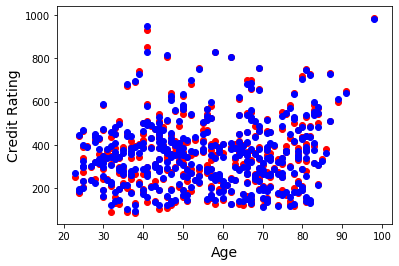

In [49]:
plt.scatter(x.T[3],pred,c='red')
plt.scatter(x.T[3],y, c='blue')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Credit Rating', fontsize=14)

Text(0, 0.5, 'Credit Rating')

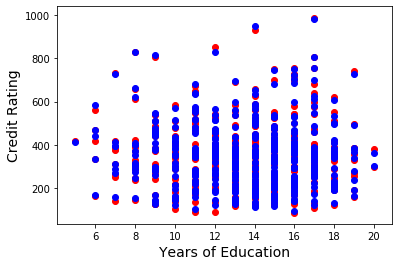

In [50]:
plt.scatter(x.T[4],pred,c='red')
plt.scatter(x.T[4],y, c='blue')
plt.xlabel('Years of Education', fontsize=14)
plt.ylabel('Credit Rating', fontsize=14)

Text(0, 0.5, 'Credit Rating')

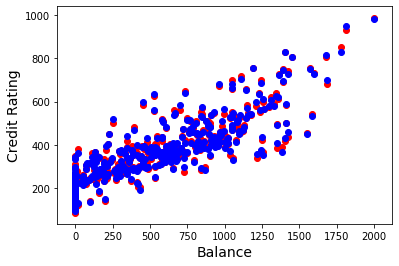

In [51]:
plt.scatter(x.T[5],pred,c='red')
plt.scatter(x.T[5],y, c='blue')
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Credit Rating', fontsize=14)